In [43]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import silhouette_samples, silhouette_score


In [46]:
#load files for analysis
reviews = pd.read_csv("reviews.csv")
reviews.head()

,brewery_id,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_abv,beer_beerid
0,10325,1.5,2.0,2.5,stcules,66,1.5,1.5,5.0,47986
1,10325,3.0,2.5,3.0,stcules,52,3.0,3.0,6.2,48213
2,10325,3.0,2.5,3.0,stcules,60,3.0,3.0,6.5,48215
3,10325,3.0,3.0,3.5,stcules,62,2.5,3.0,5.0,47969
4,1075,4.0,4.5,4.0,johnmichaelsen,10,4.0,4.5,7.7,64883


In [32]:
types = pd.read_csv("beer_types.csv")
types.head()

,beer_beerid,beer_style,styles,beer_name
0,3,13,American IPA,Cactus Queen IPA
1,88,13,American IPA,Stone IPA (India Pale Ale)
2,120,13,American IPA,Pick Axe IPA
3,205,13,American IPA,Snake Dog IPA
4,311,13,American IPA,Harpoon IPA


In [4]:
#reviews = reviews.dropna()

In [47]:
len(reviews)

1586614

In [48]:
types['styles'].unique()

array(['American IPA', 'American Stout', 'Vienna Lager',
       'English Brown Ale', 'Fruit / Vegetable Beer',
       'American Adjunct Lager', 'American Pale Lager', 'Scottish Ale',
       'Russian Imperial Stout', 'English India Pale Ale (IPA)',
       'American Pale Ale (APA)', 'American Pale Wheat Ale', 'Kölsch',
       'Extra Special / Strong Bitter (ESB)', 'German Pilsener',
       'Belgian Strong Dark Ale', 'Witbier', 'Tripel', 'Light Lager',
       'Scotch Ale / Wee Heavy', 'Altbier', 'Hefeweizen',
       'Märzen / Oktoberfest', 'American Porter', 'American Strong Ale',
       'Schwarzbier', 'Doppelbock', 'Pumpkin Ale', 'Bock', 'Cream Ale',
       'Belgian Strong Pale Ale', 'American Brown Ale',
       'Maibock / Helles Bock', 'Belgian Pale Ale', 'Belgian Dark Ale',
       'Dortmunder / Export Lager', 'Munich Dunkel Lager', 'Dunkelweizen',
       'Saison / Farmhouse Ale', 'Dubbel', 'Belgian IPA',
       'English Pale Ale', 'American Blonde Ale', 'Euro Pale Lager',
       'Engli

In [49]:
# Function to get the genre ratings
def get_style_ratings(reviews, types, styles, column_names):
    beer_ratings = pd.DataFrame()
    for style in styles:        
        beer_styles = types[types['styles'].str.contains(style) ]
        avg_style_votes_per_user = reviews[reviews['beer_beerid'].isin(types['beer_beerid'])].loc[:, ['review_profilename', 'review_overall']].groupby(['review_profilename'])['review_overall'].mean().round(2)
        
        beer_ratings = pd.concat([beer_styles, avg_style_votes_per_user], axis=1)
        
    beer_ratings.columns = column_names
    return beer_ratings


In [50]:
new = pd.merge(types, reviews, on = 'beer_beerid')
new.head()

,beer_beerid,beer_style_x,styles,beer_name,brewery_id,review_overall,review_aroma,review_appearance,review_profilename,beer_style_y,review_palate,review_taste,beer_abv
0,3,13,American IPA,Cactus Queen IPA,2,4.5,4.5,4.0,MAB,13,4.0,4.5,NaN
1,3,13,American IPA,Cactus Queen IPA,2,4.0,3.5,4.0,Morris729,13,4.0,4.0,NaN
2,3,13,American IPA,Cactus Queen IPA,2,4.0,4.0,3.5,Jason,13,4.5,4.0,NaN
3,88,13,American IPA,Stone IPA (India Pale Ale),147,4.5,4.5,4.5,Cyberkedi,13,4.0,4.5,6.9
4,88,13,American IPA,Stone IPA (India Pale Ale),147,4.5,4.5,4.5,tonk,13,4.0,4.5,6.9


In [8]:
#new = new.dropna()

In [59]:
len(new)

1051850

In [55]:
grouped = new.groupby(['review_profilename','beer_name']).mean().round(2)['review_overall']
grouped.head(20)

review_profilename  beer_name                              
0110x011            10 Commandments                            3.5
                    15th Anniversary Wood Aged                 3.5
                    Adam                                       4.0
                    AleSmith Decadence 2007 Imperial Porter    3.0
                    AleSmith IPA                               5.0
                    AleSmith My Bloody Valentine               5.0
                    AleSmith Old Numbskull                     4.0
                    AleSmith Speedway Stout                    4.5
                    AleSmith Speedway Stout - Barrel Aged      3.5
                    Bell's Expedition Stout                    4.0
                    Bell's Hopslam Ale                         4.5
                    Biere De Garde                             4.0
                    Black Orchard                              4.5
                    Blonde                                     4.5
  

In [56]:
grouped = pd.DataFrame(grouped)
grouped = grouped.reset_index()
grouped

,review_profilename,beer_name,review_overall
0,0110x011,10 Commandments,3.5
1,0110x011,15th Anniversary Wood Aged,3.5
2,0110x011,Adam,4.0
3,0110x011,AleSmith Decadence 2007 Imperial Porter,3.0
4,0110x011,AleSmith IPA,5.0
5,0110x011,AleSmith My Bloody Valentine,5.0
6,0110x011,AleSmith Old Numbskull,4.0
7,0110x011,AleSmith Speedway Stout,4.5
8,0110x011,AleSmith Speedway Stout - Barrel Aged,3.5
9,0110x011,Bell's Expedition Stout,4.0


In [57]:
user_reviews = grouped.pivot(index='review_profilename',columns='beer_name',values='review_overall')
#user_reviews = user_reviews.reset_index(drop = True)
user_reviews.head()

beer_name,! (Old Ale),"""100"" Pale Ale","""12"" Belgian Golden Strong Ale","""33"" Export","""4"" Horse Oatmeal Stout","""400"" Ale","""76"" Anniversary Ale","""76"" Anniversary Ale With English Hops","""Best Of Both Worlds"" Stout","""Cellar Reserve"" Triple Gold",...,überPils,Černá Hora Modrá Luna,Łask Žywe Niefiltrowane,Łomża Niepasteryzowana,Świąteczne,Švyturys Nefiltruotas Raw,Žamberecký Kanec 14°,Žamberecký Kanec Imperial Stout,横須賀ビアサケ (Yokosuka Biasake),葉山ビール (Hayama Beer)
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02maxima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03SVTCobra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
user_reviews.shape

(28810, 37769)

In [12]:
counted = user_reviews.count(axis=1)
counted = pd.DataFrame(counted)

In [13]:
counted.head()

,0
review_profilename,
1.0,96
2.0,1
3.0,1
4.0,3
5.0,2


In [15]:
user_reviews_counted = pd.merge(counted, user_reviews, left_index = True, right_index = True)
user_reviews_counted.head()

,0,! (Old Ale),"""100"" Pale Ale","""12"" Belgian Golden Strong Ale","""33"" Export","""76"" Anniversary Ale","""76"" Anniversary Ale With English Hops","""Cellar Reserve"" Triple Gold","""Check-Mate"" Cask Pilsner","""Fade To Black"" Porter",...,à L'Agave Et Au Citron Vert,überPils,Černá Hora Modrá Luna,Łomża Niepasteryzowana,Świąteczne,Švyturys Nefiltruotas Raw,Žamberecký Kanec 14°,Žamberecký Kanec Imperial Stout,横須賀ビアサケ (Yokosuka Biasake),葉山ビール (Hayama Beer)
review_profilename,,,,,,,,,,,,,,,,,,,,,
1.0,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_reviews_counted.to_csv("user_reviews_counted.csv", index = True, header=True)

In [27]:
user_reviews.head()

beer_name,! (Old Ale),"""100"" Pale Ale","""12"" Belgian Golden Strong Ale","""33"" Export","""76"" Anniversary Ale","""76"" Anniversary Ale With English Hops","""Cellar Reserve"" Triple Gold","""Check-Mate"" Cask Pilsner","""Fade To Black"" Porter","""Great Satchmo"" Stout",...,überPils,Černá Hora Modrá Luna,Łomża Niepasteryzowana,Świąteczne,Švyturys Nefiltruotas Raw,Žamberecký Kanec 14°,Žamberecký Kanec Imperial Stout,横須賀ビアサケ (Yokosuka Biasake),葉山ビール (Hayama Beer),review_count
review_profilename,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
user_reviews.shape

(28761, 37769)

In [16]:
y = user_reviews_counted[user_reviews_counted.columns[-15000:]]

In [17]:
y.head()

,Kerasus,Kerberos Tripel,Kerensky's Imperial Stout,Kermesse,Kernow Imperial Stout,Kerplunk Imperial Chocolate Stout,Kerst 2007 (for Brouwerij De Eem),Kerst Bier,Kerstbie,Kerstbier,...,à L'Agave Et Au Citron Vert,überPils,Černá Hora Modrá Luna,Łomża Niepasteryzowana,Świąteczne,Švyturys Nefiltruotas Raw,Žamberecký Kanec 14°,Žamberecký Kanec Imperial Stout,横須賀ビアサケ (Yokosuka Biasake),葉山ビール (Hayama Beer)
review_profilename,,,,,,,,,,,,,,,,,,,,,
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
user_reviews = user_reviews.fillna(-1) 

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15000)
pca_on_x = pca.fit(user_reviews)

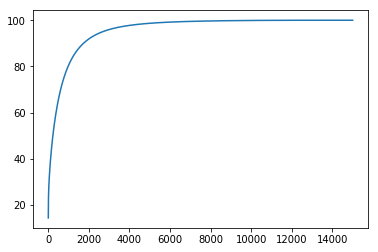

In [12]:
plt.plot(np.cumsum(pca_on_x.explained_variance_ratio_*100))

In [13]:
pca_on_x.explained_variance_ratio_.sum()

0.9999999999999992

In [15]:
pca_on_x.explained_variance_

array([1.20841425e+02, 2.02626508e+01, 1.03842021e+01, ...,
       4.20099027e-35, 6.41990811e-36, 6.41674311e-36])

In [17]:
numers = np.cumsum(pca_on_x.explained_variance_ratio_*100)

In [18]:
numers

array([ 14.39825258,  16.81254689,  18.0498243 , ..., 100.        ,
       100.        , 100.        ])

In [19]:
numbers = pd.DataFrame(numers)

In [27]:
numbers.loc[numbers[0]> 100]

,0
13840,100.0
13841,100.0
13842,100.0
13843,100.0
13844,100.0
13845,100.0
13846,100.0
13847,100.0
13848,100.0
13849,100.0


In [ ]:
pca_4 = PCA(4)
now_with_4 = pca_4.fit_transform(x_std)
now_with_4_df = pd.DataFrame(now_with_4)
sns.pairplot(now_with_4_df)

In [14]:
import pickle
filename='beer_model.sav'
pickle.dump(pca_on_x, open(filename, 'wb'))

OverflowError: cannot serialize a bytes object larger than 4 GiB

In [12]:
# Define Function to get the most rated movies
def get_most_rated_beers(user_reviews, max_number_of_beers):
    # 1- Count
    user_reviews = user_reviews.append(user_reviews.count(), ignore_index=True)
    # 2- sort
    user_reviews_sorted = user_reviews.sort_values(len(user_reviews)-1, axis=1, ascending=False)
    user_reviews_sorted = user_reviews_sorted.drop(user_reviews_sorted.tail(1).index)
    # 3- slice
    most_rated_beers = user_reviews_sorted.iloc[:, :max_number_of_beers]
    return most_rated_beers

In [13]:
def get_users_who_rate_the_most(user_reviews, max_number_of_beers):
    # Get most voting users
    # 1- Count
    user_reviews['counts'] = pd.Series(user_reviews.count(axis=1))
    # 2- Sort
    most_rated_beers_users = user_reviews.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_beers_users_selection = most_rated_beers_users.iloc[:max_number_of_beers, :]
    most_rated_beers_users_selection = most_rated_beers_users_selection.drop(['counts'], axis=1)
    return most_rated_beers_users_selection

In [32]:
# Define the sorting by rating function
def sort_by_rating_density(user_reviews, n_beers, n_users):
    most_rated_beers = get_most_rated_beers(user_reviews, n_beers)
    most_rated_beers = get_users_who_rate_the_most(most_rated_beers, n_users)
    return most_rated_beers
# choose the number of movies and users and sort
n_beers = 500
n_users = 200000
most_rated_beers_users_selection = sort_by_rating_density(user_reviews, n_beers, n_users)
# Print the result
#print(most_rated_beers_users_selection.head())

In [34]:
most_rated_beers_users_selection.head(30)

beer_name,Sierra Nevada Celebration Ale,Stone Ruination IPA,Arrogant Bastard Ale,Two Hearted Ale,Sierra Nevada Pale Ale,Stone IPA (India Pale Ale),La Fin Du Monde,Duvel,Sierra Nevada Bigfoot Barleywine Style Ale,Founders Breakfast Stout,...,Highland Gaelic Ale,Captain's Reserve Imperial IPA,Founders Nemesis 2009,Hoppe (Imperial Extra Pale Ale),Saison Du BUFF,O'Hara's Irish Stout,New World Porter,Bell's Octoberfest Beer,Autumn Maple,30th Anniversary - Grand Cru
2032,4.50,4.5,4.00,5.00,4.50,4.50,4.0,5.0,4.0,5.00,...,4.5,NaN,4.0,3.5,4.5,4.0,4.5,3.50,4.0,NaN
795,4.50,4.5,4.50,4.50,4.50,4.50,4.0,4.5,4.5,4.50,...,4.0,NaN,4.0,4.5,NaN,4.5,4.0,4.00,3.5,4.5
21869,5.00,4.5,4.50,5.00,4.50,4.00,5.0,4.5,4.0,4.50,...,4.0,4.25,4.5,4.5,5.0,NaN,4.0,4.00,4.0,4.5
10481,4.50,5.0,5.00,5.00,4.50,5.00,4.0,3.0,5.0,4.50,...,4.5,4.00,4.0,4.0,4.0,NaN,4.5,NaN,NaN,NaN
28315,4.50,4.0,4.50,4.00,4.50,4.50,5.0,4.5,4.0,4.50,...,4.0,NaN,4.0,4.5,4.0,4.5,4.5,4.00,NaN,4.0
11195,4.50,4.5,4.50,4.50,4.50,4.50,4.5,4.5,4.5,4.50,...,4.0,4.50,4.5,4.5,NaN,NaN,4.0,NaN,4.0,NaN
24706,4.75,5.0,4.50,5.00,4.50,5.00,3.0,4.0,4.5,4.50,...,4.5,4.00,NaN,4.5,5.0,NaN,4.5,4.00,3.5,4.0
22908,4.50,4.0,4.00,4.50,4.00,3.50,4.0,4.0,4.0,4.50,...,4.5,4.00,NaN,4.0,3.5,4.0,3.5,3.00,NaN,4.0
19981,4.50,4.0,4.00,4.00,4.00,5.00,4.5,4.5,4.0,4.50,...,4.5,4.00,3.5,3.5,NaN,4.0,4.5,NaN,3.5,NaN
11155,4.50,4.5,4.00,5.00,4.50,5.00,4.5,4.5,4.0,4.50,...,NaN,NaN,3.0,5.0,3.0,NaN,NaN,4.00,NaN,4.0


In [42]:
len(most_rated_beers_users_selection)

28387

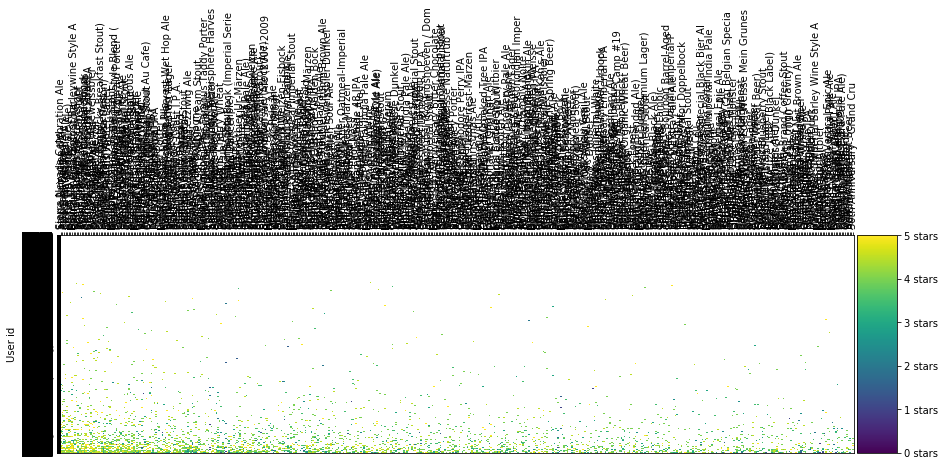

In [35]:
# Define the plotting hseatmap function
def draw_beers_heatmap(most_rated_beers_uers_selection, axis_labels =True):
    
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(most_rated_beers_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')
    if axis_labels:
        ax.set_yticks(np.arange(most_rated_beers_users_selection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(most_rated_beers_users_selection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_beers_users_selection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_beers_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    ax.grid(False)
    ax.set_ylabel('User id')
# Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
# Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])
plt.show()
# Print the heatmap
draw_beers_heatmap(most_rated_beers_users_selection)

In [17]:
#no_na = most_rated_beers_users_selection.fillna('')

In [18]:
#no_na.head()

In [19]:
most_rated_beers_users_selection.isnull().sum()

beer_name
Sierra Nevada Celebration Ale                              123
Stone Ruination IPA                                        128
Arrogant Bastard Ale                                       150
Two Hearted Ale                                            177
Sierra Nevada Pale Ale                                     232
Stone IPA (India Pale Ale)                                 150
La Fin Du Monde                                            175
Duvel                                                      192
Sierra Nevada Bigfoot Barleywine Style Ale                 165
Founders Breakfast Stout                                   266
Bell's Hopslam Ale                                         355
Samuel Adams Boston Lager                                  227
Stone Imperial Russian Stout                               206
Dead Guy Ale                                               305
Trappistes Rochefort 10                                    258
Ayinger Celebrator Doppelbock                

In [20]:
#find the Nans
most_rated_beers_users_selection.isnull().sum().sum()

48949

In [21]:
#df = most_rated_beers_users_selection.fillna(most_rated_beers_users_selection.mean(axis=0)) 

In [36]:
# Conversion to sparse csr matrix
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_beers_users_selection).to_coo())

In [23]:
# # 4 clusters
# predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)
# # Select the mas number of users and movies heatmap cluster
# max_users = 1000
# max_beers = 15
# # Cluster and print some of them
# clustered = pd.concat([most_rated_beers_users_selection(), pd.DataFrame({'group':predictions})], axis=1)
# draw_movie_clusters(clustered, max_users, max_beers)

In [24]:
#df = most_rated_beers_users_selection.reset_index()

In [37]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)

# Fit the model to the data
kmeans.fit(sparse_ratings)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(sparse_ratings)

In [38]:
most_rated_beers_users_selection['group'] = predicted_clusters
most_rated_beers_users_selection.head(45)

beer_name,Sierra Nevada Celebration Ale,Stone Ruination IPA,Arrogant Bastard Ale,Two Hearted Ale,Sierra Nevada Pale Ale,Stone IPA (India Pale Ale),La Fin Du Monde,Duvel,Sierra Nevada Bigfoot Barleywine Style Ale,Founders Breakfast Stout,...,Captain's Reserve Imperial IPA,Founders Nemesis 2009,Hoppe (Imperial Extra Pale Ale),Saison Du BUFF,O'Hara's Irish Stout,New World Porter,Bell's Octoberfest Beer,Autumn Maple,30th Anniversary - Grand Cru,group
2032,4.50,4.50,4.00,5.00,4.50,4.50,4.0,5.0,4.0,5.00,...,NaN,4.0,3.5,4.5,4.0,4.5,3.50,4.0,NaN,10
795,4.50,4.50,4.50,4.50,4.50,4.50,4.0,4.5,4.5,4.50,...,NaN,4.0,4.5,NaN,4.5,4.0,4.00,3.5,4.5,10
21869,5.00,4.50,4.50,5.00,4.50,4.00,5.0,4.5,4.0,4.50,...,4.25,4.5,4.5,5.0,NaN,4.0,4.00,4.0,4.5,10
10481,4.50,5.00,5.00,5.00,4.50,5.00,4.0,3.0,5.0,4.50,...,4.00,4.0,4.0,4.0,NaN,4.5,NaN,NaN,NaN,10
28315,4.50,4.00,4.50,4.00,4.50,4.50,5.0,4.5,4.0,4.50,...,NaN,4.0,4.5,4.0,4.5,4.5,4.00,NaN,4.0,10
11195,4.50,4.50,4.50,4.50,4.50,4.50,4.5,4.5,4.5,4.50,...,4.50,4.5,4.5,NaN,NaN,4.0,NaN,4.0,NaN,10
24706,4.75,5.00,4.50,5.00,4.50,5.00,3.0,4.0,4.5,4.50,...,4.00,NaN,4.5,5.0,NaN,4.5,4.00,3.5,4.0,10
22908,4.50,4.00,4.00,4.50,4.00,3.50,4.0,4.0,4.0,4.50,...,4.00,NaN,4.0,3.5,4.0,3.5,3.00,NaN,4.0,10
19981,4.50,4.00,4.00,4.00,4.00,5.00,4.5,4.5,4.0,4.50,...,4.00,3.5,3.5,NaN,4.0,4.5,NaN,3.5,NaN,10
11155,4.50,4.50,4.00,5.00,4.50,5.00,4.5,4.5,4.0,4.50,...,NaN,3.0,5.0,3.0,NaN,NaN,4.00,NaN,4.0,10


In [40]:
most_rated_beers_users_selection.to_csv("check.csv", index = False, header=True)

In [27]:
most_rated_beers_users_selection.isnull().sum().sum()

48949

In [28]:
clustered = most_rated_beers_users_selection

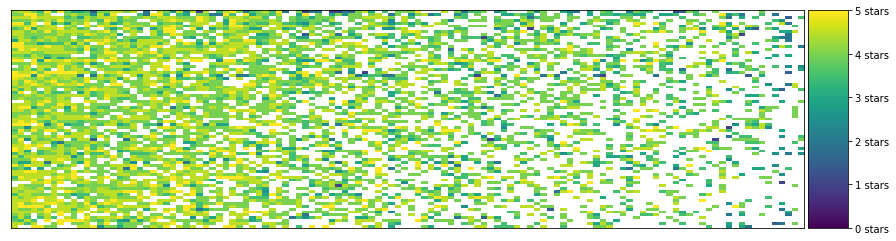

In [29]:
# Pick a cluster ID from the clusters above
cluster_number = 7
# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['group'], axis=1)
# Sort and print the cluster
cluster = sort_by_rating_density(cluster, n_movies, n_users)
draw_beers_heatmap(cluster, axis_labels=False)

In [30]:
# Print the ratings
cluster.fillna('').head(40)

beer_name,Racer 5 India Pale Ale,Two Hearted Ale,Stone IPA (India Pale Ale),Duvel,Stone Ruination IPA,Founders Breakfast Stout,Sierra Nevada Torpedo Extra IPA,Founders KBS (Kentucky Breakfast Stout),Hop Rod Rye,Sierra Nevada Celebration Ale,...,Pabst Blue Ribbon (PBR),Samuel Adams Holiday Porter,Samuel Adams White Ale,Samuel Adams Cream Stout,Samuel Adams Double Bock (Imperial Series),Boddingtons Pub Ale,Coors Light,Corona Extra,Spaten Optimator,Samuel Adams Cherry Wheat
0,4.17,4.5,4.5,4,3.5,5,3.5,5,3.75,3,...,,,,4,,,,,,
1,4,4,5,5,4,4.5,,,4,4.5,...,2,,,3.5,,2,,,,
2,4.5,4.5,4.5,5,4.5,4.5,4.5,4.5,3.5,4,...,3,,3.5,,,,,1.5,,3.5
3,4,4,4,4.5,4,4.5,4,5,4,4,...,,,,,,3.5,2.5,,,
4,5,5,3.5,5,,5,3,4,3,4.5,...,4,,,,3.5,,4.5,2,,
5,4.5,4.5,4.5,5,4,4.5,4.5,,4.5,4,...,,4.5,4,,,,,,3.5,
6,3.5,4,5,3,4.5,4.5,4.5,5,4,4.5,...,,2.5,1.5,,4,3,,,,
7,4.5,4.5,4,4.5,4,5,4,4.5,4.5,4.5,...,4,,,,,,3,3,4.5,
8,4.5,4.5,4,4,4,4,4,4.5,4,4.5,...,1,,,,,,,2,,
9,4,4.5,4,3.5,4,4.5,4.5,4,4,,...,,,,,,3,2,2,,


In [31]:
# Fill in the name of the column/movie. e.g. 'Forrest Gump (1994)'
beer_name = "Raging Bitch Belgian-Style IPA"
cluster[beer_name].mean()

KeyError: 'Raging Bitch Belgian-Style IPA'

In [ ]:
cluster.mean().head(20)

In [ ]:
# Pick a user ID from the dataset
user_id = 28
# Get all this user's ratings
user_2_ratings  = cluster.loc[user_id, :]
# Which movies did they not rate? 
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]
# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]
# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]

In [45]:
df = most_rated_beers_users_selection.fillna(most_rated_beers_users_selection.mean(axis=0)) 

In [ ]:
#df = df.fillna(df.mean(axis=0)) 

In [ ]:
Sum_of_squared_distances = []
K = range(1,35)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Sum_of_squared_distances = []
# K = range(1,35)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(df)
#     Sum_of_squared_distances.append(km.inertia_)

# plt.plot(K, Sum_of_squared_distances, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Sum_of_squared_distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()